<a href="https://colab.research.google.com/github/sophiasarica/my_project/blob/main/Sophia_Sarica_Project6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Cleaning Project by Vehicle Make and Model <a id="4"></a>



**DataSets**

[Vehicle Crashes](https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes/65du-s3qu)

[Personal Details](https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes-Person-Details-/py4c-dicf)

[Vehicle Details](https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes-Vehicle-Details/mhft-5t5y)


**Importing  'Vehichle Details' DataSet**




In [ ]:
# import pyplot interface of matplotlib
import matplotlib.pyplot as plt

%matplotlib inline


In [ ]:
import pandas as pd

## read_csv file 
#df = pd.read_csv("/content/mhft-5t5y.csv")
df = pd.read_csv('https://opendata.maryland.gov/resource/mhft-5t5y.csv?$limit=800000', low_memory=False)

#df.head()

In [ ]:
df.head()

,harm_event_desc,harm_event_code,conti_direction_desc,conti_direction_code,damage_desc,damage_code,movement_desc,movement_code,vin_no,report_no,cv_body_type_desc,cv_body_type_code,veh_year,veh_make,veh_model,commercial_flag_desc,commercial_flag,hzm_num,towed_away_flag_desc,towed_away_flag,num_axles,gvw_desc,gvw_code,going_direction_desc,going_direction_code,body_type_desc,body_type_code,driverless_flag_desc,driverless_flag,fire_flag_desc,fire_flag,parked_flag_desc,parked_flag,speed_limit,hit_and_run_flag_desc,hit_and_run_flag,hazmat_spill_flag_desc,hazmat_spill_flag,vehicle_id,towed_vehicle_config_desc,towed_vehicle_config_code,area_damaged_code_imp1,area_damaged_code1,area_damaged_code2,area_damaged_code3,area_damaged_code_main_desc,area_damaged_code_main,year,quarter
0,Other Vehicle,1.0,North,N,Unknown,99,Unknown,99.0,NaN,AE5057004X,NaN,NaN,NaN,UNKNOWN,UNKNOWN,No,N,NaN,No,N,NaN,NaN,NaN,North,N,NaN,NaN,NaN,U,No,N,No,N,25,Yes,Y,NaN,NaN,47e2531d-8c69-470c-9198-502a46c7639e,Unknown,99,11.0,10.0,11.0,12.0,Eleven o'clock,11.0,2020,Q2
1,Other Vehicle,1.0,North,N,Superficial,2,Moving Constant Speed,1.0,NMTKHMBX0JR025092,MSP7221001P,NaN,NaN,2018.0,TOYOTA,CAMRY,No,N,NaN,No,N,NaN,NaN,NaN,North,N,Passenger Car,2.00,No,N,No,N,No,N,55,No,N,NaN,NaN,0dbd4a00-c7f2-4c34-b543-c2633fe0118f,Not Applicable,0,12.0,6.0,12.0,NaN,Twelve o'clock,12.0,2020,Q2
2,Other Vehicle,1.0,South,S,Functional,3,Stopped in Traffic Lane,6.0,2GNAXPEX5K6103012,DA37010040,NaN,NaN,2019.0,CHEVROLET,EQUINOX,No,N,NaN,No,N,NaN,NaN,NaN,South,S,(Sport) Utility Vehicle,23.08,No,N,No,N,No,N,30,No,N,NaN,NaN,f2c0d05c-ff70-4549-9d48-57c182eae6f2,Not Applicable,0,6.0,6.0,NaN,NaN,Six o'clock,6.0,2020,Q2
3,Fixed Object,9.0,Unknown,U,Unknown,99,Not Applicable,0.0,NaN,MDTA1791002C,NaN,NaN,NaN,UNKNOWN,UNKNOWN,No,N,NaN,No,N,NaN,NaN,NaN,Unknown,U,NaN,NaN,No,N,No,N,No,N,35,Yes,Y,NaN,NaN,5a55c4ee-17e9-4eed-bfe9-f5aca18f5b9e,Not Applicable,0,99.0,99.0,NaN,NaN,Unknown,99.0,2020,Q2
4,Other Vehicle,1.0,East,E,Disabling,4,Slowing or Stopping,3.0,5FNRL18672B048550,AE456100BL,NaN,NaN,2002.0,HONDA,VAN,No,N,NaN,Yes,Y,NaN,NaN,NaN,East,E,Passenger Car,2.00,No,N,No,N,No,N,35,No,N,NaN,NaN,23d968b0-be0e-4810-b6f0-34ef33fd7112,Not Applicable,0,6.0,6.0,12.0,NaN,Six o'clock,6.0,2020,Q2


In [ ]:
pd.set_option('display.max_rows', 9999)


In [ ]:
df['veh_make'][:50]

0        UNKNOWN
1         TOYOTA
2      CHEVROLET
3        UNKNOWN
4          HONDA
5           FORD
6           HOND
7          VOLVO
8          HONDA
9           MAZD
10      NEWFLYER
11          TOYT
12         MAZDA
13    MITSUBISHI
14         HONDA
15        TOYOTA
16        NISSAN
17          FORD
18           KIA
19         CHEVY
20          SUZI
21          FORD
22          FORD
23       UNKNOWN
24          PIRC
25    VOLKSWAGON
26         HONDA
27        TOYOTA
28        NISSAN
29        TOYOTA
30        YAMAHA
31       HYUNDAI
32     CHEVROLET
33         CHEVY
34        TOYOTA
35          MERZ
36        NISSAN
37       HYUNDAI
38        NISSAN
39          CADI
40     CHEVROLET
41         HONDA
42          PTRB
43          HOND
44          ACUR
45        SUBARU
46         DODGE
47          JEEP
48         BUICK
49          CADI
Name: veh_make, dtype: object

In [ ]:
#df.columns

# Cleaning Datasets <a id="0"></a>


In [ ]:
# Clubbing repeating Car Manufacturers into 1 value for each manufacturer

makes = {"ACURA",
 "ALLIS CHALMERS",
 "ALPHA ROMEO",
 "AMC",
 "AUDI",
 "BMW",
 "BRIGGS & STRATTON",
 "BUICK",
 "CADILLAC",
 "CATERPILLAR",
 "CHEVROLET",
 "CHRYSLER",
 "CONTINENTAL",
 "CUMMINS",
 "DETROIT DIESEL",
 "DEUTZ",
 "DODGE",
 "FIAT",
 "FORD",
 "GEO",
 "GMC",
 "HENSHEL",
 "HERCULES",
 "HINO",
 "HONDA",
 "HUNMER",
 "HYUNDAI",
 "INFINITY",
 "INTERNATIONAL",
 "ISUZU",
 "IVECO-FIAT",
 "JAGUAR",
 "JEEP",
 "JOHN DEERE",
 "KIA",
 "KOHLER",
 "KOMATSU",
 "KUBOTA",
 "LAND ROVER",
 "LEXUS",
 "LINCOLN",
 "LISTER PETTER",
 "MACK",
 "MAZDA",
 "MERCEDES",
 "MERCURY",
 "MINI COOPER",
 "MITSUBISHI",
 "NISSAN",
 "OLDSMOBILE",
 "ONAN",
 "PERKINS",
 "PEUGEOT",
 "PLYMOUTH",
 "PONTIAC",
 "PORSCHE",
 "RENAULT",
 "SAAB",
 "SATURN",
 "SCANIA",
 "SCION",
 "SUBARU",
 "SUZUKI",
 "TESLA",
 "TOYOTA",
 "VOLKSWAGEN",
 "VOLVO",
 "WISCONSIN",
 "YANMER-MARINE"}

In [ ]:
#https://stackoverflow.com/questions/17388213/find-the-similarity-metric-between-two-strings
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a.upper(), b.upper()).ratio()

# similar('volk1', 'VOLKSWAGEN')

In [ ]:
 #https://stackoverflow.com/questions/7331462/check-if-a-string-is-a-possible-abbrevation-for-a-name
import re    
def is_abbrev(abbrev, text):
    try:
      pattern = ".*".join(abbrev.upper())
      return re.match("^" + pattern, text.upper()) is not None
    except:
      print(abbrev, text)
      raise Exception('error')

# is_abbrev('inf', 'INFINITI')

In [ ]:
import re
def clean_string(word):
  return re.sub('[^A-Za-z0-9]+', '', word).upper()

#clean_string('JEE[')

In [ ]:
def get_correct_make(value):
  if type(value) != str:
    return None

  value = clean_string(value)
  if value in makes:
    return value

  for make in makes:
    if is_abbrev(value, make) == True:
      return make

  for make in makes:
    if similar(value, make) >= 0.6 :
      return make

  return None

# get_correct_make('tyt')

In [ ]:
corrections = {
    'CHEVY': 'CHEVROLET'
}

for make in set(df['veh_make']):
  correct_brand = get_correct_make(make)
  corrections[make] = correct_brand

In [ ]:
 #corrections

In [ ]:
def get_correct_value(value):
  if value not in corrections:
    return None
  # print(value, type(value))
  return corrections[value]

In [ ]:
df['VEH_MAKE_CLEAN'] = [ get_correct_value(x) for x in df['veh_make']]

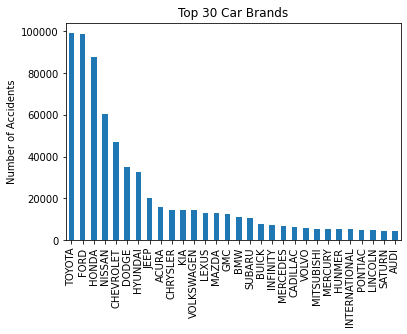

In [ ]:

df['VEH_MAKE_CLEAN'].value_counts()[:30].plot(kind='bar')
plt.title('Top 30 Car Brands')
plt.ylabel("Number of Accidents")
plt.show()

We can see that Toyota and Ford cars have the highest number of crashes followed by Honda, Nissan and Chevrolet

In [ ]:
df[df['VEH_MAKE_CLEAN']=='Unknown'][[ 'veh_make']].value_counts()

Series([], dtype: int64)

In [ ]:
df['VEH_MAKE_CLEAN'].value_counts()

TOYOTA               99146
FORD                 98758
HONDA                87782
NISSAN               60192
CHEVROLET            47034
DODGE                35169
HYUNDAI              32724
JEEP                 20205
ACURA                15705
CHRYSLER             14309
KIA                  14286
VOLKSWAGEN           14283
LEXUS                13000
MAZDA                12920
GMC                  12328
BMW                  11229
SUBARU               10531
BUICK                 7601
INFINITY              7224
MERCEDES              6582
CADILLAC              6085
VOLVO                 5666
MITSUBISHI            5440
MERCURY               5341
HUNMER                5313
INTERNATIONAL         5205
PONTIAC               5068
LINCOLN               4767
SATURN                4402
AUDI                  4316
SCION                 1972
SUZUKI                1932
MACK                  1912
AMC                   1597
ISUZU                 1371
KOMATSU               1280
LAND ROVER            1266
O

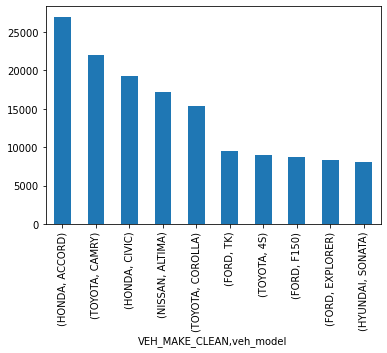

In [ ]:
df[['VEH_MAKE_CLEAN','veh_model']].value_counts()[:10].plot(kind='bar')


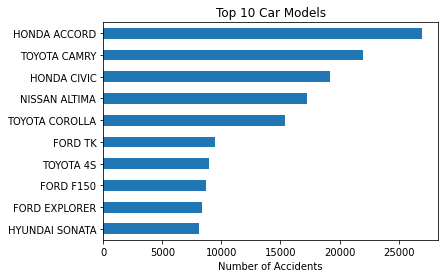

In [ ]:
ax = (df['VEH_MAKE_CLEAN'] + ' ' + df['veh_model']).value_counts()[:10].plot(kind='barh' )
ax.invert_yaxis()
plt.title('Top 10 Car Models')
plt.xlabel("Number of Accidents")
plt.show()


Honda Accord tops the list of cars with most accidents followed by Toyota Camry and Honda Civic at the 2nd and 3nd places respectively.

In [ ]:
#pd.options.display.max_rows


In [ ]:
#df[['veh_year']].value_counts()


In [ ]:
df_year = df['veh_year']
df_year.dropna(inplace=True)
df_year = df_year.astype(int)

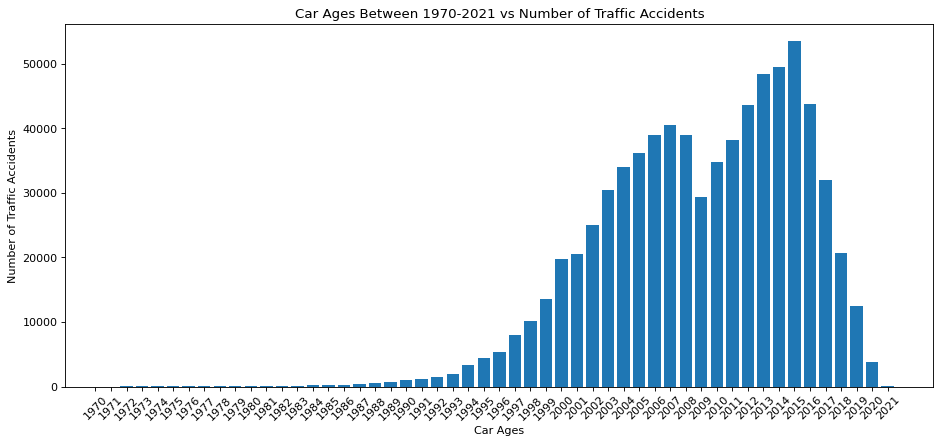

In [ ]:
plt.figure(figsize=(14, 6), dpi=80)

df_year_counts = df_year[(df_year > 1970) & (df_year < 2022)].value_counts()
df_year_counts.sort_index(inplace=True)
# df_year_counts.plot()
plt.bar(df_year_counts.index, df_year_counts)
plt.xticks(list(range(1970, 2022)), rotation=45)
plt.title("Car Ages Between 1970-2021 vs Number of Traffic Accidents")
plt.ylabel("Number of Traffic Accidents")
plt.xlabel("Car Ages")
plt.show()

In [ ]:
crashes = pd.read_csv('https://opendata.maryland.gov/resource/65du-s3qu.csv?$limit=800000', low_memory=False)


In [ ]:
df.columns

Index(['harm_event_desc', 'harm_event_code', 'conti_direction_desc',
       'conti_direction_code', 'damage_desc', 'damage_code', 'movement_desc',
       'movement_code', 'vin_no', 'report_no', 'cv_body_type_desc',
       'cv_body_type_code', 'veh_year', 'veh_make', 'veh_model',
       'commercial_flag_desc', 'commercial_flag', 'hzm_num',
       'towed_away_flag_desc', 'towed_away_flag', 'num_axles', 'gvw_desc',
       'gvw_code', 'going_direction_desc', 'going_direction_code',
       'body_type_desc', 'body_type_code', 'driverless_flag_desc',
       'driverless_flag', 'fire_flag_desc', 'fire_flag', 'parked_flag_desc',
       'parked_flag', 'speed_limit', 'hit_and_run_flag_desc',
       'hit_and_run_flag', 'hazmat_spill_flag_desc', 'hazmat_spill_flag',
       'vehicle_id', 'towed_vehicle_config_desc', 'towed_vehicle_config_code',
       'area_damaged_code_imp1', 'area_damaged_code1', 'area_damaged_code2',
       'area_damaged_code3', 'area_damaged_code_main_desc',
       'area_damaged_

In [ ]:
df_merged = crashes.merge(df, on='report_no', how='left')

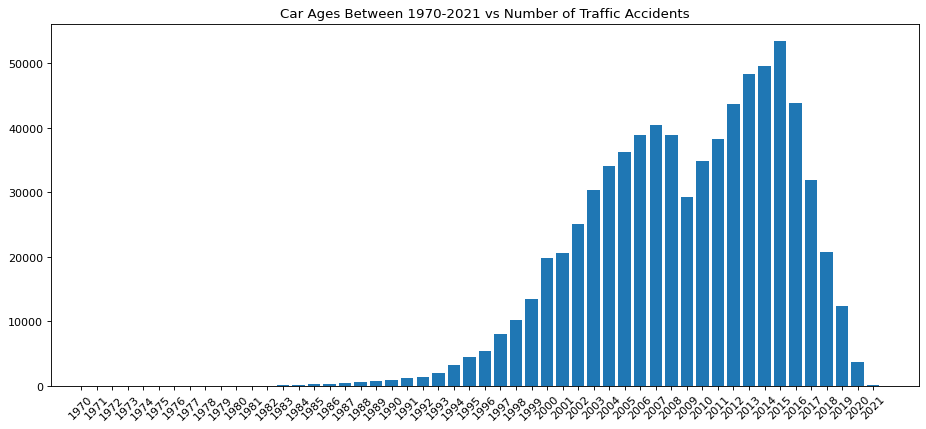

In [ ]:
df_year = df_merged['veh_year']
df_year.dropna(inplace=True)
df_year = df_year.astype(int)

plt.figure(figsize=(14, 6), dpi=80)

df_year_counts = df_year[(df_year > 1970) & (df_year < 2022)].value_counts()
df_year_counts.sort_index(inplace=True)
# df_year_counts.plot()
plt.bar(df_year_counts.index, df_year_counts)
plt.xticks(list(range(1970, 2022)), rotation=45)
plt.title("Car Ages Between 1970-2021 vs Number of Traffic Accidents")

plt.show()

Biomodel Distribution; the dataset has two distinct peaks when the data contains two different populations.

<Figure size 1120x480 with 0 Axes>

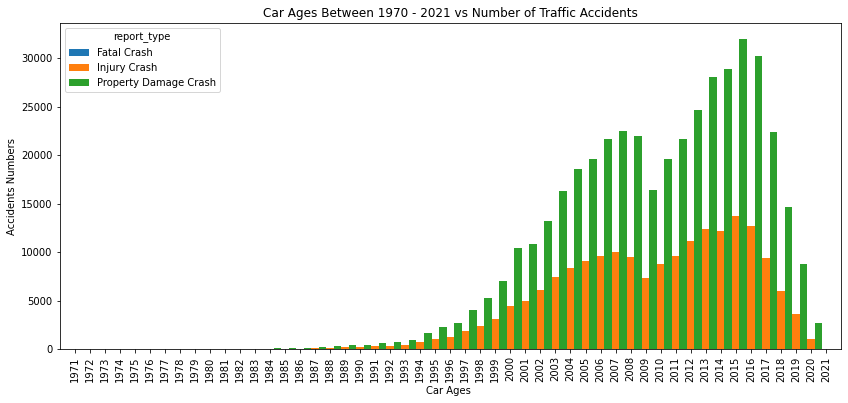

In [ ]:
plt.figure(figsize=(14, 6), dpi=80)

df_year_rt = df_merged[['veh_year', 'report_type']][(df_merged['veh_year'] > 1970) & (df_merged['veh_year'] < 2022)]
df_year_rt.dropna(inplace=True)
df_year_rt['veh_year'] = df_year_rt['veh_year'] .astype(int)

df_year_rt.groupby(['report_type', 'veh_year']).size().unstack(level=0).plot(kind='bar', figsize=(14, 6), width=1.5)
plt.xlabel("Car Ages ")
plt.ylabel("Accidents Numbers")
plt.title("Car Ages Between 1970 - 2021 vs Number of Traffic Accidents")
plt.show()

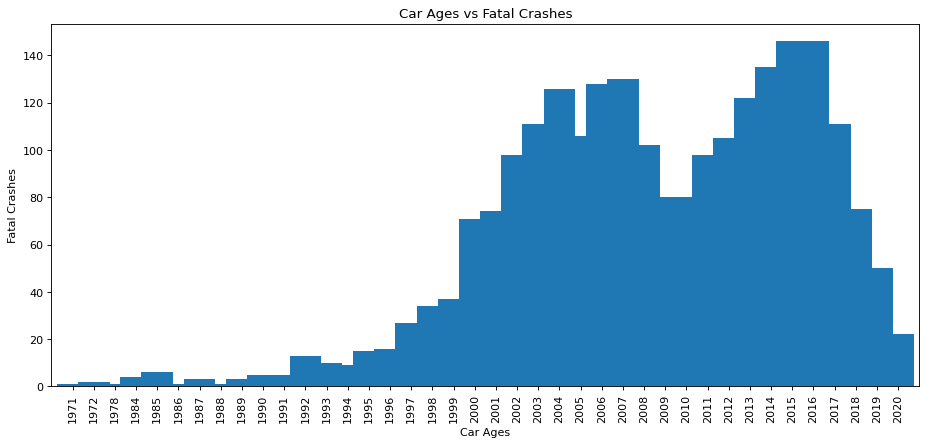

In [ ]:
plt.figure(figsize=(14, 6), dpi=80)

df_year_rt = df_merged[['veh_year', 'report_type']][(df_merged['veh_year'] > 1970) & (df_merged['veh_year'] < 2022) & (df_merged['report_type'] == 'Fatal Crash')]
df_year_rt.dropna(inplace=True)
df_year_rt['veh_year'] = df_year_rt['veh_year'] .astype(int)
plt.ylabel("Fatal Crashes")
#plt.xlabel("Car Ages")
df_year_rt.groupby('veh_year').size().plot(kind='bar', figsize=(14, 6), width=1.5)
plt.title("Car Ages vs Fatal Crashes")
plt.xlabel("Car Ages")
plt.show()

## What Did I learn 
I explored the vehicle details dataset and the crashes dataset to find answers the following questions?


*   Which car brands & models are involved in crashes the most?

*   Is there any correlation between cars' age and crashes?  


Firstly, I started to work on the 'Veh_make' column. 'Veh_make' column represents cars' brand.  I noticed that there are various issues with the values, including different spellings for the same brand. So, I standardized the 'Veh_make' column, cleaned the invalid values, and made it ready for visualizations. When I  created the visualization for the first question, I discovered that Toyota is more involved in crashes than the other car brands. Also, Toyota and Ford are so close to each other, and as the data updated, the order of the car brands easily can change. During my study, sometimes I saw Ford is in the first place! However, this doesn't imply any causation, the Toyota, Ford, Honda are the most selling brands hence it's like to get involved in more accidents in terms of numbers. 

However, each brand has various models and graphs above doesn't give a clear picture about the specific modesl. I combined 'veh_make' and 'veh_models' columns to figure out the top 10 car models that involved in accidents. This time visualization shows us 'Honda Accord' is in the first place. I was expecting a Toyota or Ford model to be involved in the most crashes based on  the first visualization. My assumption was wrong!

Finally, I wanted to see if there is any correlation between car age & number of accidents involved. Year column had many incorrect values so I filtered between 1970 and 2021 to focus on the valid years. When I visualized, the car year vs total number accidents, I observed that there are two peak points in our bimodal distribution. The peaks are around 2006 and 2015 for car ages. It doesn't seems there is a correlation between car age and the total number of accidents. 

However, Cars made in 2009 have a significantly low rate of accidents as compared to the cars made in years before and ahead of them. One hypothesis is that this could be due to the financial crisis of 2008. With people losing jobs and market falling, the purchasing power of the public had declined, leading to lesser cars made in 2009 being sold. This could be one of the reasons for the dip in number of crashes for cars of 2009 make.

